# 앙상블(Ensemble) - 1. 보팅, 배깅, 랜덤포레스트

# 보팅( Voting Classifier)

### 개별 분류기의 성능과 보팅 분류기의 성능 비교

### 하드보팅 모델 학습 및 예측

In [2]:
# 위스콘식 유방암 데이터세트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score


In [3]:
# 데이터 살펴보기
b_cancer = load_breast_cancer()
cancer_df = pd.DataFrame(b_cancer.data, columns=b_cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X=b_cancer.data
y=b_cancer.target
#데이터 분할
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=156)

* 로지스틱 회귀, KNN을 기반으로 한 소프트보팅 분류기

In [8]:
# 서로 다른 개별 학습기 생성
lr_clf = LogisticRegression(max_iter=100000)
knn_clf = KNeighborsClassifier(n_neighbors=8)
dt_clf = DecisionTreeClassifier(max_depth=3)

# 앙상블 객체 생성
vo_clf = VotingClassifier([('LR',lr_clf),('KNN',knn_clf),('DT',dt_clf)],voting='soft')
# 앙상블 학습기 학습
vo_clf.fit(X_train, y_train)

train_score = accuracy_score(y_train,vo_clf.predict(X_train))
test_score = accuracy_score(y_test, vo_clf.predict(X_test))

print(train_score)
print(test_score)

0.9758241758241758
0.9473684210526315


In [9]:
# 앙상블하지 않은 각각의 학습기 성능
list_ = [lr_clf, knn_clf, dt_clf]
for i in list_:
    i.fit(X_train,y_train)
    train_score = accuracy_score(y_train, i.predict(X_train))
    test_score = accuracy_score(y_test, i.predict(X_test))
    print(train_score, test_score)

0.9582417582417583 0.9649122807017544
0.9384615384615385 0.9385964912280702
0.9736263736263736 0.956140350877193


# Random Forest : 와인 데이터셋

In [12]:
wine_kaggle = pd.read_csv('C:/Users/gihun/Python_Data/data/wine_dataset.csv')
wine_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [20]:
# 임의로 선정해서 쓸꺼임
wine = wine_kaggle[['alcohol','residual_sugar','pH','style']]
wine.columns = ['alcohol','sugar','pH','style']
wine['style']=wine['style'].replace('red',0)
wine['style']=wine['style'].replace('white',1)
X=wine.iloc[:,:-1].values
y=wine['style'].values
X,y

C:\Users\gihun\AppData\Local\Temp\ipykernel_17792\3138609866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['style']=wine['style'].replace('red',0)
C:\Users\gihun\AppData\Local\Temp\ipykernel_17792\3138609866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['style']=wine['style'].replace('white',1)


(array([[ 9.4 ,  1.9 ,  3.51],
        [ 9.8 ,  2.6 ,  3.2 ],
        [ 9.8 ,  2.3 ,  3.26],
        ...,
        [ 9.4 ,  1.2 ,  2.99],
        [12.8 ,  1.1 ,  3.34],
        [11.8 ,  0.8 ,  3.26]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [21]:
# 데이터 분할 :test_size=0.2, random_state=42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

하이퍼 파라미터
n_estimators: 모형(week learner)의 개수, 순차적으로 오류를 보정해 수가 많으면 성능이 일정 수준까지 높아질 수 있으나, 수행 시간이 오래 걸린다는 단점이 있음(디폴트는 100)
min_samples_leaf: 말단 리프 노드의 최소한의 샘플 데이터 수, 디폴트 1
max_depth: 트리의 최대 깊이, 디폴트 3
max_features: 디폴트는 auto, If “auto”, then max_features=sqrt(n_features) 즉, 피처가 4개면 분할을 위해 2개 참조 


In [22]:
# RandomForestClassifier 모델 구축, 학습 및 평가
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)
train_score = accuracy_score(y_train, rf_clf.predict(X_train))
test_score = accuracy_score(y_test, rf_clf.predict(X_test))
print(train_score,test_score) # 과대적합이 일어났다!

0.996921300750433 0.8892307692307693


### 랜덤 포레스트 하이퍼파라미터 튜닝

In [23]:
# 과대적합이므로 그리드서치
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[100, 200, 300, 400, 500], 'max_depth':[3, 5, 7, 9, 11], 'min_samples_leaf':[8, 12, 18], 'min_samples_split':[8, 16, 20]}
grid = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 500}

In [24]:
best = grid.best_estimator_ # 가장 좋은 파라미터를 학습한 애 모델
best

RandomForestClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=8,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [25]:
train_score = accuracy_score(y_train, best.predict(X_train))
test_score = accuracy_score(y_test, best.predict(X_test))
print(train_score, test_score) # 신뢰성은 여기가 더 좋음

0.8964787377333077 0.8638461538461538


* [참고] 트리 갯수 300개로 증가시킨후 학습 -> 별도의 테스트 데이터셋에서 예측 -> 성능측정

In [30]:
wine.columns[:-1]

Index(['alcohol', 'sugar', 'pH'], dtype='object')

### 특성 중요도(feature importances)

In [31]:
imp_feature = pd.Series(best.feature_importances_, index=wine.columns[:-1]).sort_values(ascending=False)

<AxesSubplot: >

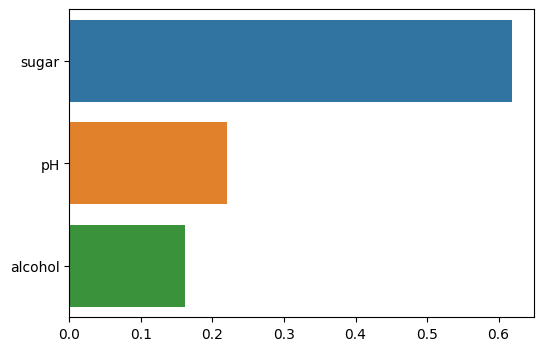

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.barplot(x=imp_feature.values, y=imp_feature.index)

# [실습]  사용자 행동 인식 데이터 세트 랜덤포레스트 분류하라
(기본 모델 -> 하이퍼파라미터 튜닝 -> 피처 중요도 시각화)

### 랜덤 포레스트 하이퍼 파라미터 튜닝

### 피처별 중요도 시각화

# 실습] 타이타닉 데이터셋 랜덤 포레스트 분류
기본 모델 - 하이퍼파라미터 튜닝 - 특성 중요도 시각화

In [70]:
titanic_df = pd.read_csv('C:/Users/gihun/Python_data/data/titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
x_df = titanic_df

In [73]:
x_df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
x_df.dropna(inplace=True)

In [75]:
X = x_df.drop('Survived',axis=1).values
y = x_df['Survived'].values
X.shape,y.shape

((712, 8), (712,))

In [77]:
#x_df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
x_df['Sex']=x_df['Sex'].replace('male',0) # 남자 -> 0
x_df['Sex']=x_df['Sex'].replace('female',1) # 여자 -> 1
x_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,Q
886,887,0,2,0,27.0,0,0,13.0000,S
887,888,1,1,1,19.0,0,0,30.0000,S
889,890,1,1,0,26.0,0,0,30.0000,C


In [78]:
x_df = pd.get_dummies(x_df)
x_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,0,1,0
886,887,0,2,0,27.0,0,0,13.0000,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,1,0,0


In [79]:
X = x_df.values
y = y
X.shape,y.shape

((712, 11), (712,))

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestClassifier
Rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
Rf_clf.fit(X_train,y_train)
train_score = accuracy_score(y_train,Rf_clf.predict(X_train))
test_score = accuracy_score(y_test, Rf_clf.predict(X_test))
print(train_score,test_score)

1.0 1.0


### 하이퍼 파라미터

In [61]:
RandomForestClassifier
# 과대적합이므로 그리드서치
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[100, 200, 300, 400, 500], 'max_depth':[3, 5, 7, 9, 11], 'min_samples_leaf':[8, 12, 18], 'min_samples_split':[8, 16, 20]}
grid = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)
grid.best_params_

KeyboardInterrupt: 

In [ ]:
grid.

In [ ]:
# GridSearchCV()를 활용한 최적의 파라미터 찾기

### 특성 중요도

# 실습] 와인데이터셋 랜덤포레스트 분류하기
기본 모델 -> 튜닝 -> 점수 ->  특성 중요도 시각화